fit parameter 1-sigma error
———————————–
-0.07113031194352526+-0.0020542482561554777
0.49297194810580636+-0.013013144919648037
2.089548603822875+-0.058112966824444515


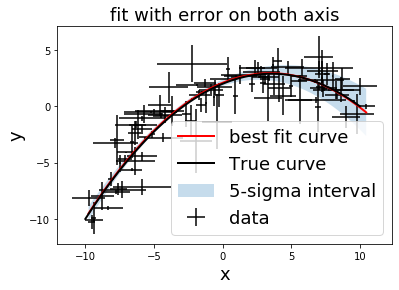

In [8]:
# trying out confidence intreval for predictions

# source https://micropore.wordpress.com/2017/02/07/python-fit-with-error-on-both-axis/

import numpy as np
from pylab import *
from scipy.optimize import curve_fit
from scipy import odr

def func(p, x):

    a, b, c = p
    return a * x *x + b*x + c

# Model object
quad_model = odr.Model(func)

# test data and error
x0 = np.linspace(-10, 10, 100)
y0 = -0.07 * x0 * x0 + 0.5 * x0 + 2.
noise_x = np.random.normal(0.0, 1.0, len(x0))
noise_y = np.random.normal(0.0, 1.0, len(x0))
y = y0 + noise_y
x = x0 + noise_x

# Create a RealData object
data = odr.RealData(x, y, sx=noise_x, sy=noise_y)

# Set up ODR with the model and data.
odr = odr.ODR(data, quad_model, beta0=[0., 1., 1.])

# Run the regression.
out = odr.run()

#print fit parameters and 1-sigma estimates
popt = out.beta
perr = out.sd_beta
print('fit parameter 1-sigma error')
print('———————————–')
for i in range(len(popt)):
    print(str(popt[i])+ '+-' +str(perr[i]))

# prepare confidence level curves
nstd = 5. # to draw 5-sigma intervals
popt_up = popt + nstd * perr
popt_dw = popt  - nstd * perr

x_fit = np.linspace(min(x), max(x), 100)
fit = func(popt, x_fit)
fit_up = func(popt_up, x_fit)
fit_dw= func(popt_dw, x_fit)

#plot
fig, ax = plt.subplots(1)
rcParams['font.size']= 20
errorbar(x, y, yerr=noise_y, xerr=noise_x, hold=True, ecolor='k', fmt='none', label='data')
xlabel('x', fontsize=18)
ylabel('y', fontsize=18)
title('fit with error on both axis', fontsize=18)
plot(x_fit, fit, 'r', lw=2, label='best fit curve')
plot(x0, y0, 'k-', lw=2, label= 'True curve')
ax.fill_between(x_fit, fit_up, fit_dw, alpha=.25, label='5-sigma interval')
legend(loc='lower right',fontsize=18)
show()

In [9]:
popt

array([-0.07113031,  0.49297195,  2.0895486 ])

In [10]:
perr

array([0.00205425, 0.01301314, 0.05811297])